In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image

In [2]:
# Load data

image_dir = "CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


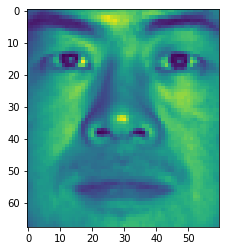

In [3]:
plt.imshow(imgs[1]) # Display first image

In [4]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width*height

# Compute input matrix X
X_list = [np.reshape(imgs[i].getdata(), (wh)) for i in range(n)]
X = np.array(X_list)
print(X.shape)
print(X)


(38, 4080)
[[ 75  85  89 ...  42  29  26]
 [ 71  71  71 ... 142 131 127]
 [ 86  97 109 ...  52  52  59]
 ...
 [ 69  73  76 ...  22  25  40]
 [ 19  30  47 ...  83  76  65]
 [ 67  69  78 ...  64  16   2]]


In [5]:

# Subtract the mean image from input matrix X
mX = X - np.mean(X, axis=0)
COVx = np.cov(mX.T)
values, vectors = np.linalg.eig(COVx)

K = 5
vectors[:,:K].shape


(4080, 5)

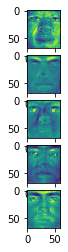

In [13]:
fig2, axs = plt.subplots(nrows=K, ncols=1) # two axes on figure

for k in range(K):
    eigvec = vectors[:,k]
    
    #axs[k].imshow(x, z)

    axs[k].imshow(np.reshape(np.real(eigvec), (height, width) ))
    